In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
d=pd.read_csv("fish_environment_dataset (3).csv")

In [93]:
d

,Fish Species,Temperature (°C),pH,Turbidity (NTU),Dissolved Oxygen (mg/L),Salinity (ppt),Ammonia (%),Nitrates (%)
0,Trout,12.19,7.40,3.65,11.24,4.07,1.96,37.53
1,NaN,28.69,6.76,42.27,7.00,3.84,0.14,10.09
2,Catfish,20.34,NaN,90.42,6.93,3.35,0.69,13.09
3,Goldfish,23.04,7.11,15.89,5.20,0.63,2.69,18.04
4,Eel,21.66,6.23,22.69,4.93,28.11,2.13,2.40
...,...,...,...,...,...,...,...,...
9995,Bass,18.10,7.38,23.85,6.90,6.00,2.99,35.78
9996,Clownfish,27.47,8.27,4.59,7.68,NaN,2.39,3.07
9997,Trout,14.73,7.36,9.10,11.23,2.88,2.60,10.88
9998,Catfish,21.44,7.37,13.01,3.64,1.98,2.31,43.71


In [94]:
d.isna().sum()

Fish Species               500
Temperature (°C)           498
pH                         499
Turbidity (NTU)            495
Dissolved Oxygen (mg/L)    500
Salinity (ppt)             497
Ammonia (%)                500
Nitrates (%)               500
dtype: int64

In [95]:
df=d.dropna()

In [96]:
df.isna().sum()

Fish Species               0
Temperature (°C)           0
pH                         0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Salinity (ppt)             0
Ammonia (%)                0
Nitrates (%)               0
dtype: int64

In [97]:
df['Fish Species'].unique()

array(['Trout', 'Goldfish', 'Eel', 'Catfish', 'Salmon', 'Tilapia', 'Bass',
       'Clownfish'], dtype=object)

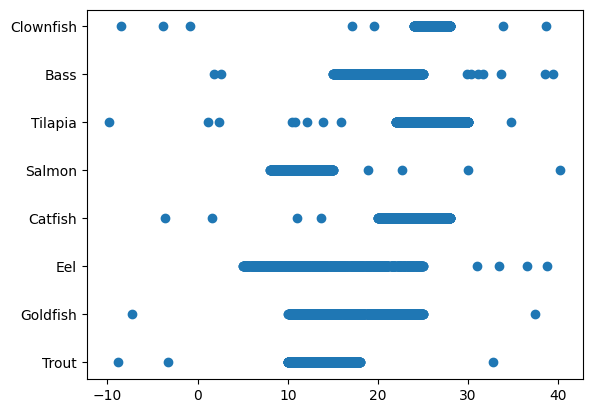

In [98]:
plt.scatter(df['Temperature (°C)'], df['Fish Species'])

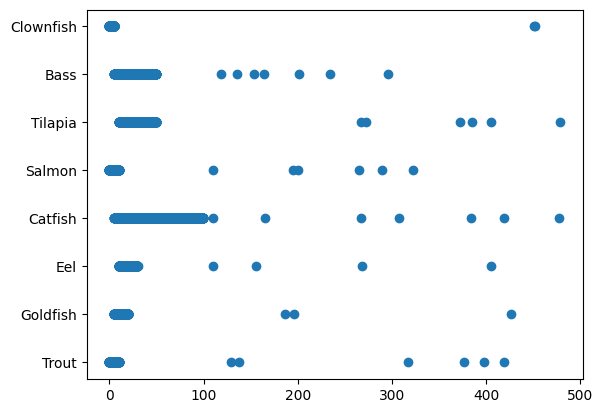

In [99]:
plt.scatter(df['Turbidity (NTU)'], df['Fish Species'])

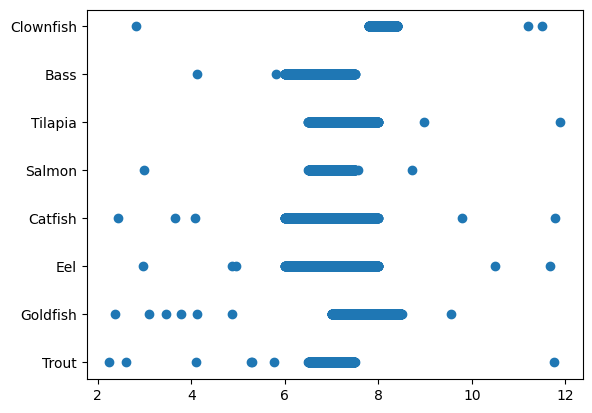

In [100]:
plt.scatter(df['pH'], df['Fish Species'])

In [101]:
max(df['pH'])

11.891508288573228

In [102]:
from sklearn import tree

In [103]:
m=tree.DecisionTreeClassifier()

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
df.columns

Index(['Fish Species', 'Temperature (°C)', 'pH', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Salinity (ppt)', 'Ammonia (%)',
       'Nitrates (%)'],
      dtype='object')

In [106]:
x=df[['Temperature (°C)', 'pH', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'Salinity (ppt)', 'Ammonia (%)',
       'Nitrates (%)','Dissolved Oxygen (mg/L)']]
y=df['Fish Species']

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [108]:
m.fit(x_train,y_train)

DecisionTreeClassifier()

In [109]:
m.predict(x_test)

array(['Salmon', 'Clownfish', 'Eel', ..., 'Eel', 'Catfish', 'Tilapia'],
      dtype=object)

In [110]:
y_test

1293       Salmon
9670    Clownfish
3682          Eel
7040         Bass
7648       Salmon
          ...    
1330       Salmon
3617          Eel
8988          Eel
1085      Catfish
3821      Tilapia
Name: Fish Species, Length: 1661, dtype: object

In [111]:
m.score(x_test,y_test)

0.8922335942203492

In [112]:
m.score(x_train,y_train)

1.0

[Text(0.6674728009695634, 0.9838709677419355, 'x[4] <= 9.99\ngini = 0.875\nsamples = 4980\nvalue = [624.0, 629.0, 628.0, 632.0, 600.0, 588.0, 634.0, 645.0]'),
 Text(0.37724973994097505, 0.9516129032258065, 'x[2] <= 9.995\ngini = 0.812\nsamples = 3225\nvalue = [622.0, 628.0, 0.0, 112.0, 598.0, 0.0, 629.0, 636.0]'),
 Text(0.08738063456207003, 0.9193548387096774, 'x[3] <= 6.994\ngini = 0.49\nsamples = 933\nvalue = [60.0, 41.0, 0.0, 0.0, 201.0, 0.0, 0.0, 631.0]'),
 Text(0.03450046205975973, 0.8870967741935484, 'x[1] <= 6.98\ngini = 0.495\nsamples = 212\nvalue = [29, 41, 0, 0, 142, 0, 0, 0]'),
 Text(0.01642879145702844, 0.8548387096774194, 'x[0] <= 20.575\ngini = 0.5\nsamples = 41\nvalue = [21, 20, 0, 0, 0, 0, 0, 0]'),
 Text(0.006571516582811377, 0.8225806451612904, 'x[0] <= 14.6\ngini = 0.188\nsamples = 19\nvalue = [17, 2, 0, 0, 0, 0, 0, 0]'),
 Text(0.0032857582914056884, 0.7903225806451613, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0]'),
 Text(0.009857274874217066, 0.7903225

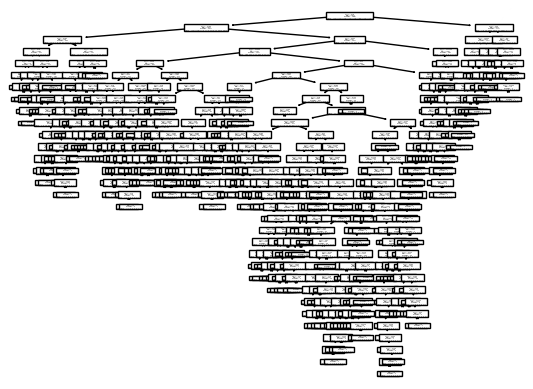

In [113]:
tree.plot_tree(m)

In [114]:
import pickle
pickle.dump(m,open('model.pkl','wb'))